### 붓꽃 데이터 셋을 이용한 클러스 평가

앞의 붓꽃 데이터 셋의 군집화 결과를 실루엣 분석으로 평가  
silhouette_samples() / silhouette_score() 사용

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

iris = load_iris()

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# KMeans로 군집화 수행

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [4]:
iris_df['cluster'] = kmeans.labels_
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [5]:
# 실루엣 계수값 구하기 

from sklearn.metrics import silhouette_samples, silhouette_score

# silhouette_samples(계수를 구할 데이터, 컬럼)
# iris_df의 모든 개별 데이터의 실루엣 계수값 구하기
score_samples = silhouette_samples(iris.data, iris_df["cluster"])
score_samples.shape

(150,)

In [6]:
# iris_df에 개별 실루엣 계수 컬럼 추가
iris_df['silhouette_coeff'] = score_samples
iris_df.head()
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
145,6.7,3.0,5.2,2.3,2,0.425136
146,6.3,2.5,5.0,1.9,0,0.104171
147,6.5,3.0,5.2,2.0,2,0.314930
148,6.2,3.4,5.4,2.3,2,0.352454
149,5.9,3.0,5.1,1.8,0,0.185442


In [7]:
# 모든 데이터의 평균 실루엣 계수값 구하기
average_score = silhouette_score(iris.data, iris_df["cluster"])
average_score

np.float64(0.5528190123564095)

In [8]:
# 군집별 실루엣 계수값 확인
iris_df.groupby("cluster")["silhouette_coeff"].mean()
# 전체 실루엣 계수 평균값이 0.55인데
# 1번 군집만 평균이상, 0, 2번 군집은 평균보다 낮음
# 개별 군집의 평균값이 전체 평균값보다 낮은 군집이 많으면 군집 평가가 떨어지게 됨

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [9]:
iris_df[iris_df['cluster']==1].head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [10]:
iris_df[iris_df['cluster']==2].head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
52,6.9,3.1,4.9,1.5,2,0.053401
77,6.7,3.0,5.0,1.7,2,0.117982
100,6.3,3.3,6.0,2.5,2,0.499275
102,7.1,3.0,5.9,2.1,2,0.611936
103,6.3,2.9,5.6,1.8,2,0.360759


In [11]:
iris_df[iris_df['cluster']==0].head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
50,7.0,3.2,4.7,1.4,0,0.026722
51,6.4,3.2,4.5,1.5,0,0.381186
53,5.5,2.3,4.0,1.3,0,0.592944
54,6.5,2.8,4.6,1.5,0,0.368853
55,5.7,2.8,4.5,1.3,0,0.592210


<Axes: >

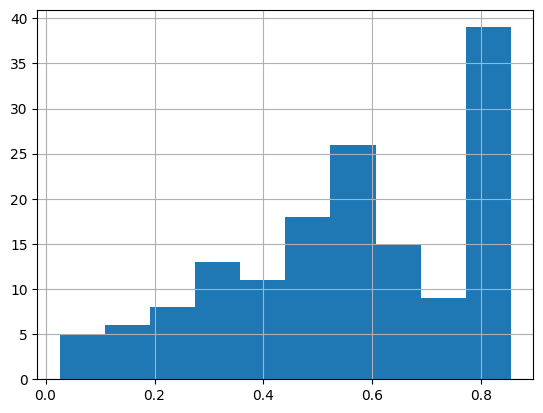

In [12]:
iris_df['silhouette_coeff'].hist()
plt.show()

### 군집 개수에 따른 K-평균 군집화 실루엣 분석

### 붓꽃 데이터를 이용해 K-평균 수행 시 최적의 군집 개수 확인

In [16]:
from matplotlib import cm

In [17]:
def visualize_silhouette(cluster_lists, X_features):  
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, n_init=10,  max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

    plt.show()

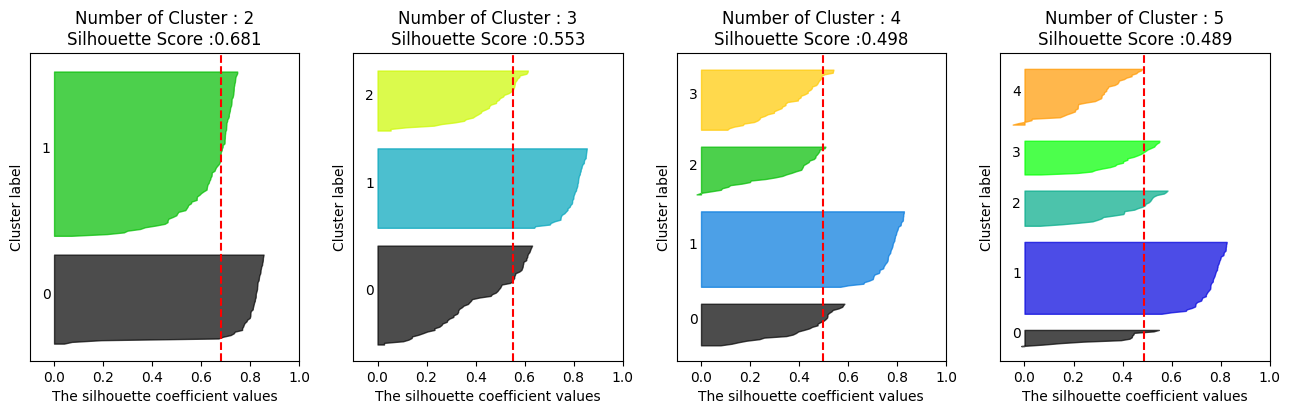

In [18]:
# 붓꽃 데이터 세트로 군집화한 결과 평가

from sklearn.datasets import load_iris

iris = load_iris()
visualize_silhouette([2, 3, 4,5], iris.data)




### 결론
- 2개 군집이 가장 좋은 결과로 보임
- 3개 군집도 사용은 가능해보임
    - 하지만 전체 실루엣 스코어가 0.5를 넘어가야 어느정도 평가를 받을 수 있는데,
    - 0.5가 넘어가주고 있고
    - 모든 군집이 50%는 실루엣계수 이상 나와줘야 좋은데,
    - 0, 2번이 50%까지는 안넘는데 40%정도는 되니까 사용가능
- 4, 5개 군집은 사용이 불가능한 군집으로 보여짐
    - 몇개 군집에서는 끝에 마이너스 실루엣 계수도 보이고
    - 대체적으로 한 군집 이외에는 50%를 넘지 못하고 있음
    - 특성파악이 어렵다(인사이트 도출이 어렵다)는 의미
- 이 계수가 판단의 기준, 절대적인 수치는 아니고 다른 것을 통해서 인사이트가 도출되었는데,
- 5개 군집이 의미가 있다면 쓰는게 맞다

**군집화 주의사항**
- 사이킷런의 군집화 알고리즘은 메모리를 상당히 많이 사용함
- 기존의 값들을 기억한 상태로 매 순간 중심점을 이동해줘야하기때문에
- 특히 군집 결과 평가인 실루엣 분석이 메모리 소비량이 많음
#### 따라서
- 대용량 데이터를 일반 pc에서 군집-실루엣 분석 진행할때에는
    - 군집화는 전체데이터로 진행해도 결과 평가는 군집별로 샘플링해서 진행하기도 함